In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
adult_lit = pd.read_csv('../data/UNdata_Export_20230926_021055618.csv', skipfooter = 2, engine = 'python')

In [3]:
adult_lit

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,Female 15+ yr,2000,UNESCO_UIS Database_Sep2007,Percent,12.6,NaN
1,Afghanistan,Male 15+ yr,2000,UNESCO_UIS Database_Sep2007,Percent,43.1,NaN
2,Albania,Female 15+ yr,2001,UNESCO_UIS Database_Sep2007,Percent,98.3,NaN
3,Albania,Male 15+ yr,2001,UNESCO_UIS Database_Sep2007,Percent,99.2,NaN
4,Algeria,Female 15+ yr,2002,UNESCO_UIS Database_Sep2007,Percent,60.1,NaN
...,...,...,...,...,...,...,...
475,Zambia,Male 15+ yr,1990,UNESCO_UIS Database_Sep2007,Percent,73.0,NaN
476,Zimbabwe,Female 15+ yr,2004,UNESCO_UIS Database_Sep2007,Percent,86.2,1.0
477,Zimbabwe,Female 15+ yr,1992,UNESCO_UIS Database_Sep2007,Percent,78.5,NaN
478,Zimbabwe,Male 15+ yr,2004,UNESCO_UIS Database_Sep2007,Percent,92.7,1.0


In [4]:
adult_lit = adult_lit.drop(columns = ['Source', 'Value Footnotes', 'Unit'])

In [5]:
adult_lit = adult_lit.rename(columns = {'Value' : 'Percent_Value', 'Country or Area' : 'Country', 'Subgroup' : 'Gender'})

In [6]:
adult_lit

,Country,Gender,Year,Percent_Value
0,Afghanistan,Female 15+ yr,2000,12.6
1,Afghanistan,Male 15+ yr,2000,43.1
2,Albania,Female 15+ yr,2001,98.3
3,Albania,Male 15+ yr,2001,99.2
4,Algeria,Female 15+ yr,2002,60.1
...,...,...,...,...
475,Zambia,Male 15+ yr,1990,73.0
476,Zimbabwe,Female 15+ yr,2004,86.2
477,Zimbabwe,Female 15+ yr,1992,78.5
478,Zimbabwe,Male 15+ yr,2004,92.7


**Which Country had the highest & lowest Adult literacy Rate and in which year?**

In [7]:
adult_lit.sort_values('Percent_Value', ascending = False)

,Country,Gender,Year,Percent_Value
147,Estonia,Male 15+ yr,1989,99.9
216,Latvia,Male 15+ yr,2000,99.8
217,Latvia,Male 15+ yr,1989,99.8
120,Cuba,Female 15+ yr,2002,99.8
121,Cuba,Male 15+ yr,2002,99.8
...,...,...,...,...
86,Chad,Female 15+ yr,2000,12.8
0,Afghanistan,Female 15+ yr,2000,12.6
257,Mali,Female 15+ yr,1998,11.9
63,Burkina Faso,Female 15+ yr,1991,8.2


In [55]:
adult_lit.loc[(adult_lit['Country']== 'Estonia')]

,Country,Gender,Year,Percent_Value
144,Estonia,Female 15+ yr,2000,99.8
145,Estonia,Female 15+ yr,1989,99.6
146,Estonia,Male 15+ yr,2000,99.8
147,Estonia,Male 15+ yr,1989,99.9


In [56]:
adult_lit.loc[(adult_lit['Country']== 'Burkina Faso')]

,Country,Gender,Year,Percent_Value
60,Burkina Faso,Female 15+ yr,2005,16.6
61,Burkina Faso,Female 15+ yr,2003,15.2
62,Burkina Faso,Female 15+ yr,1996,8.1
63,Burkina Faso,Female 15+ yr,1991,8.2
64,Burkina Faso,Male 15+ yr,2005,31.4
65,Burkina Faso,Male 15+ yr,2003,29.4
66,Burkina Faso,Male 15+ yr,1996,18.5
67,Burkina Faso,Male 15+ yr,1991,19.6


**The country with the highest adult literacy was Estonia is 1989 with 99.9% of males 15+**

**How does the adult literacy rate differ between females and males**

In [8]:
# Average adult literacy rate for each gender in a Country
adult_lit_pivot = adult_lit.pivot_table(values = "Percent_Value", index = "Country", columns = 'Gender').reset_index()

In [9]:
adult_lit_pivot.sort_values

Gender,Country,Female 15+ yr,Male 15+ yr
0,Afghanistan,12.60,43.10
1,Albania,98.30,99.20
2,Algeria,47.95,71.50
3,Angola,54.20,82.90
4,Argentina,96.60,96.70
...,...,...,...
130,Venezuela,90.85,92.00
131,Vietnam,84.85,93.45
132,Yemen,25.90,64.90
133,Zambia,58.60,74.65


In [43]:
adult_lit_pivot_year = adult_lit.pivot_table(values = "Percent_Value", index = "Year", columns = 'Gender').reset_index()

In [51]:
adult_lit_pivot_year


Gender,Year,Female 15+ yr,Male 15+ yr
0,1985,80.325000,88.175000
1,1986,52.525000,66.650000
2,1987,51.600000,70.533333
3,1988,27.425000,50.175000
4,1989,95.810000,98.670000
5,1990,74.657143,85.121429
6,1991,66.252381,77.638095
7,1992,75.960000,85.250000
8,1993,76.066667,84.600000
9,1994,60.825000,75.141667


**Introducing GDP_df and merging with Adult_lit**

In [10]:
GDP_df = pd.read_csv('../data/gdp_per_capita.csv')

In [11]:
GDP_df = GDP_df.drop(['Value Footnotes'], axis = 1)

In [12]:
GDP_df = GDP_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})

In [13]:
adult_lit_and_GDP = pd.merge(GDP_df, adult_lit)

In [64]:
adult_lit_and_GDP

,Country,Year,GDP_Per_Capita,Gender,Percent_Value
0,Albania,2001,6441.449833,Female 15+ yr,98.3
1,Albania,2001,6441.449833,Male 15+ yr,99.2
2,Algeria,2002,9232.415784,Female 15+ yr,60.1
3,Algeria,2002,9232.415784,Male 15+ yr,79.6
4,Angola,2001,4746.660523,Female 15+ yr,54.2
...,...,...,...,...,...
355,Zambia,1990,2190.181724,Male 15+ yr,73.0
356,Zimbabwe,2004,1979.200783,Female 15+ yr,86.2
357,Zimbabwe,2004,1979.200783,Male 15+ yr,92.7
358,Zimbabwe,1992,2437.152908,Female 15+ yr,78.5


In [82]:
adult_lit_and_GDP.groupby(['Country', 'Year'])[['Percent_Value', 'GDP_Per_Capita']].mean()

Percent_Value  GDP_Per_Capita
Country   Year                               
Albania   2001          98.75     6441.449833
Algeria   2002          69.85     9232.415784
Angola    2001          68.55     4746.660523
Argentina 1991          96.10    15221.792147
          2001          97.20    17610.755386
...                       ...             ...
Vietnam   1999          90.40     3455.112485
Zambia    1990          65.20     2190.181724
          1999          68.05     1968.215220
Zimbabwe  1992          83.70     2437.152908
          2004          89.45     1979.200783

[180 rows x 2 columns]

In [75]:
adult_lit_and_GDP.drop_duplicates(subset = 'Gender')

,Country,Year,GDP_Per_Capita,Gender,Percent_Value
0,Albania,2001,6441.449833,Female 15+ yr,98.3
1,Albania,2001,6441.449833,Male 15+ yr,99.2


**Next few code shows me ceating a pivot table with each gender and average literacy rate from 1990 - 2005**

In [45]:
adult_lit_Fem = adult_lit_and_GDP.loc[adult_lit_and_GDP['Gender'].isin(['Female 15+ yr'])].pivot_table(values = 'Percent_Value', index = 'Year', columns = 'Gender').dropna().reset_index()

In [46]:
adult_lit_Fem

Gender,Year,Female 15+ yr
0,1990,73.860000
1,1991,61.605882
2,1992,73.844444
3,1993,76.066667
4,1994,66.400000
5,1995,81.180000
6,1996,69.471429
7,1997,25.000000
8,1998,37.975000
9,1999,88.250000


In [47]:
adult_lit_Male = adult_lit_and_GDP.loc[adult_lit_and_GDP['Gender'].isin(['Male 15+ yr'])].pivot_table(values = 'Percent_Value', index = 'Year', columns = 'Gender').dropna().reset_index()

In [63]:
adult_lit_Male

Gender,Year,Male 15+ yr
0,1990,84.050000
1,1991,73.517647
2,1992,84.144444
3,1993,84.600000
4,1994,76.112500
5,1995,87.300000
6,1996,76.542857
7,1997,54.800000
8,1998,59.100000
9,1999,90.566667


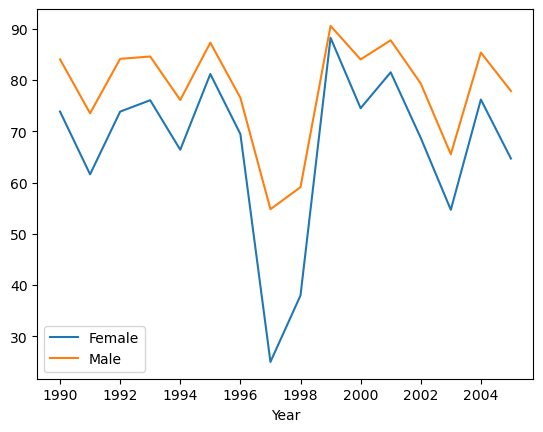

In [50]:
axes = plt.gca()
adult_lit_Fem.plot.line(x='Year', y='Female 15+ yr', label='Female', ax=axes);
adult_lit_Male.plot.line(x='Year', y='Male 15+ yr', label='Male', ax=axes);

**Does Adult Literacy and GDP have a correlation**

**Which continent has the highest Adult Literacy**

In [ ]:
pd.read_csv('..')